In [1]:
import glob
import os
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import soundfile as sf
from matplotlib.pyplot import specgram

In [2]:
def windows(data, window_size):
    start = 0
    while start < len(data):
        yield int(start), int(start + window_size)
        start += (window_size / 2)

In [3]:
bands = 60
frames = 41
window_size = 512 * (frames - 1)
log_specgrams = []
labels = []
noise_types = os.listdir('Pure Noise1/')
for nt in noise_types[1:]:
    all_files = os.listdir('Pure Noise1/' + nt + '/')
    for file in all_files:
        if file.endswith('.wav'):
            print('Loading: ' + 'Pure Noise1/' + nt + '/' + file)
            sound_clip,s = librosa.load('Pure Noise1/' + nt + '/' + file)
            if (len(sound_clip[0].shape) == 2):
                sound_clip[0] = (np.sum(sound_clip[0], axis=1))/2
            for (start,end) in windows(sound_clip,window_size):
                if(len(sound_clip[start:end]) == window_size):
                    signal = sound_clip[start:end]
                    melspec = librosa.feature.melspectrogram(signal, n_mels = bands)
                    logspec = librosa.logamplitude(melspec)
                    logspec = logspec.T.flatten()[:, np.newaxis].T
                    log_specgrams.append(logspec)
                    labels.append(nt)            
log_specgrams = np.asarray(log_specgrams).reshape(len(log_specgrams),bands,frames,1)
features = np.concatenate((log_specgrams, np.zeros(np.shape(log_specgrams))), axis = 3)
for i in range(len(features)):
    features[i, :, :, 1] = librosa.feature.delta(features[i, :, :, 0])


Loading: Pure Noise1/air_conditioner/121285.wav
Loading: Pure Noise1/air_conditioner/121286.wav
Loading: Pure Noise1/air_conditioner/127872.wav
Loading: Pure Noise1/air_conditioner/127873.wav
Loading: Pure Noise1/air_conditioner/134717.wav
Loading: Pure Noise1/air_conditioner/146690.wav
Loading: Pure Noise1/air_conditioner/146709.wav
Loading: Pure Noise1/air_conditioner/146714.wav
Loading: Pure Noise1/air_conditioner/47160.wav
Loading: Pure Noise1/air_conditioner/50901.wav
Loading: Pure Noise1/air_conditioner/56385.wav
Loading: Pure Noise1/air_conditioner/57320.wav
Loading: Pure Noise1/air_conditioner/60846.wav
Loading: Pure Noise1/air_conditioner/62461.wav
Loading: Pure Noise1/air_conditioner/63724.wav
Loading: Pure Noise1/air_conditioner/73524.wav
Loading: Pure Noise1/air_conditioner/74507.wav
Loading: Pure Noise1/air_conditioner/79089.wav
Loading: Pure Noise1/air_conditioner/80589.wav
Loading: Pure Noise1/air_conditioner/83502.wav
Loading: Pure Noise1/Bike/motorcycle-arrive-and-shut

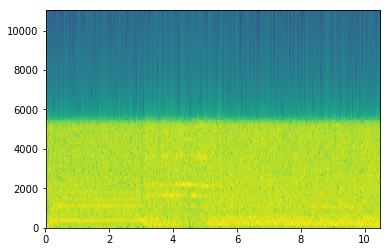

In [4]:

specgram(sound_clip, Fs=22050)
plt.show()


In [6]:
features = np.array(features)
labels = np.array(labels, dtype = np.int)

ValueError: invalid literal for int() with base 10: 'air_conditioner'

In [ ]:
features.shape